In [1]:
"""
3D and 4D niimgs: handling and visualizing.
3D和4D niimgs:处理和可视化
==========================================

Here we discover how to work with 3D and 4D niimgs.
在这里，我们发现如何与3D和4D niim工作
"""

'\n3D and 4D niimgs: handling and visualizing.\n3D和4D niimgs:处理和可视化\n==========================================\n\nHere we discover how to work with 3D and 4D niimgs.\n在这里，我们发现如何与3D和4D niim工作\n'

In [2]:
###############################################################################
# Downloading tutorial datasets from Internet
# --------------------------------------------
#
# Nilearn comes with functions that download public data from Internet
#
# Let's first check where the data is downloaded on our disk:
from nilearn import datasets
print('Datasets are stored in: %r' % datasets.get_data_dirs())

Datasets are stored in: ['C:\\Users\\Administrator/nilearn_data']


In [4]:
###############################################################################
# Let's now retrieve a motor contrast from a Neurovault repository
# 现在让我们从神经库库中检索一个运动对比
motor_images = datasets.fetch_neurovault_motor_task()
motor_images.images

['C:\\Users\\Administrator/nilearn_data\\neurovault\\collection_658\\image_10426.nii.gz']

In [5]:
###############################################################################
# motor_images is a list of filenames. We need to take the first one
# 电机图像是一个文件名列表。我们需要第一个
tmap_filename = motor_images.images[0]

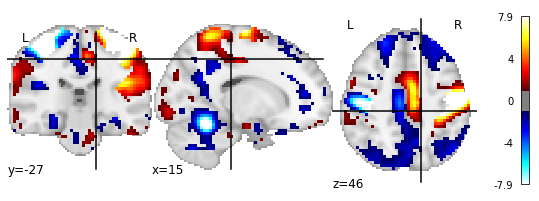

In [10]:
###############################################################################
# Visualizing a 3D file
# 可视化一个3D文件
# ----------------------
#
# The file contains a 3D volume, we can easily visualize it as a statistical map:
# 该文件包含一个三维卷，我们可以很容易地可视化它作为一个统计地图:
from nilearn import plotting
plotting.plot_stat_map(tmap_filename, threshold=1)

# threshold 阈值

# 这个阈值应该是自己调试的

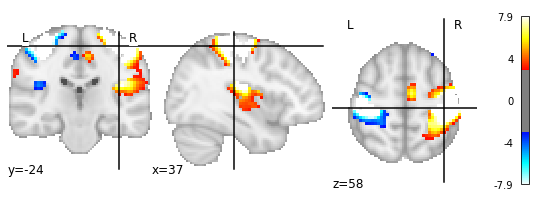

In [7]:
###############################################################################
# Visualizing works better with a threshold
plotting.plot_stat_map(tmap_filename, threshold=3)

In [12]:
###############################################################################
# Visualizing one volume in a 4D file
# -----------------------------------
#
# We can download resting-state networks from the Smith 2009 study on
# correspondance between rest and task
rsn = datasets.fetch_atlas_smith_2009()['rsn10']
rsn

# 【报错】 
# Downloading data from http://www.fmrib.ox.ac.uk/datasets/brainmap+rsns/rsn20.nii.gz ...
# Error while fetching file rsn20.nii.gz; dataset fetching aborted.

Error while fetching file rsn20.nii.gz; dataset fetching aborted.

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1076)>

In [ ]:
###############################################################################
# It is a 4D nifti file. We load it into the memory to print its
# shape.
from nilearn import image
print(image.load_img(rsn).shape)

In [ ]:
###############################################################################
# We can retrieve the first volume (note that Python indexing starts at 0):
first_rsn = image.index_img(rsn, 0)
print(first_rsn.shape)

In [ ]:
###############################################################################
# first_rsn is a 3D image.
#
# We can then plot it
plotting.plot_stat_map(first_rsn)

In [ ]:
###############################################################################
# Looping on all volumes in a 4D file
# -----------------------------------
#
# If we want to plot all the volumes in this 4D file, we can use iter_img
# to loop on them.
#
# Then we give a few arguments to plot_stat_map in order to have a more
# compact display.
for img in image.iter_img(rsn):
    # img is now an in-memory 3D img
    plotting.plot_stat_map(img, threshold=3, display_mode="z", cut_coords=1,
                           colorbar=False)

In [ ]:
###############################################################################
# Looping through selected volumes in a 4D file
# ---------------------------------------------
#
# If we want to plot selected volumes in this 4D file, we can use index_img
# with the `slice` constructor to select the desired volumes. 
# 
# Afterwards, we'll use iter_img to loop through them following the same 
# formula as before.
selected_volumes = image.index_img(rsn, slice(3, 5))

In [ ]:
###############################################################################
# If you're new to Python, one thing to note is that the slice constructor
# uses 0-based indexing. You can confirm this by matching these slices
# to the previous plot above.

for img in image.iter_img(selected_volumes):
    plotting.plot_stat_map(img)

In [ ]:
###############################################################################
# plotting.show is useful to force the display of figures when running
# outside IPython
plotting.show()

In [ ]:
#########################################################################
# |
#
# ______
#
# To recap, neuroimaging images (niimgs as we call them) come in
# different flavors:
#
# * 3D images, containing only one brain volume
# * 4D images, containing multiple brain volumes.
#
# More details about the input formats in nilearn for 3D and 4D images is
# given in the documentation section: :ref:`loading_data`.
#
# Functions accept either 3D or 4D images, and we need to use on the one
# hand :func:`nilearn.image.index_img` or :func:`nilearn.image.iter_img`
# to break down 4D images into 3D images, and on the other hand
# :func:`nilearn.image.concat_imgs` to group a list of 3D images into a 4D
# image.